In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import random
from sklearn.manifold import TSNE

In [3]:
# LOADING DATA
df=pd.read_csv('C:/Users/rsroh/Downloads/mnist-in-csv/mnist_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [4]:
print(df.head())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [5]:
label=df.label
data=df.drop('label',axis=1)

In [6]:
# Visualizing data
def print_index(id):
    idx=id
    grid_data=data.iloc[idx].values.reshape(28,28)
    plt.imshow(grid_data,interpolation=None,cmap='gray')
    plt.title(label[idx])

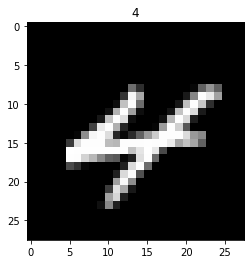

In [7]:
print_index(random.randint(0,1000))

In [8]:
#Column Standaradization
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

(60000, 784)


In [17]:
# PCA Mathematics
cov_matrix=np.dot(standardized_data.T,standardized_data)
values,vectors=eigh(cov_matrix,eigvals=(782,783))
new_data=np.dot(vectors.T,standardized_data.T)
print(new_data.shape)
xdash=np.vstack((new_data,label)).T
print(xdash.shape)

(2, 60000)
(60000, 3)


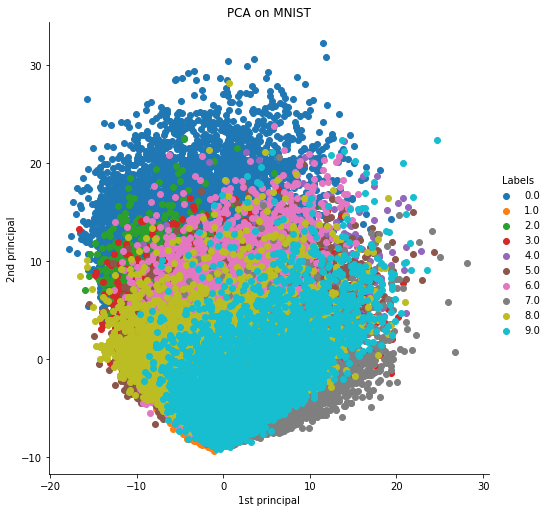

In [20]:
#Visualising in 2-D space
df=pd.DataFrame(data=xdash,columns=('1st principal','2nd principal','Labels'))
sns.FacetGrid(df,hue='Labels',height=7).map(plt.scatter,'1st principal','2nd principal').add_legend()
plt.title('PCA on MNIST')
plt.show()

In [ ]:
#t-SNE
model=TSNE(n_components=2,random_state=0)
tsne_model=model.fit_transform(standardized_data)



In [ ]:
tsne_data=np.vstack((tsne_model.T,label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('Dim_1','Dim_1','Labels'))
tsne_df1=tsne_df[1:1000]



In [ ]:
sns.FacetGrid(tsne_df1,hue='Labels',height=7).map(plt.scatter,'Dim1','Dim2').add_legend()
print("Done")
plt.show()
print("That's the representation")